1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

Text(0, 0.5, 'features_3')

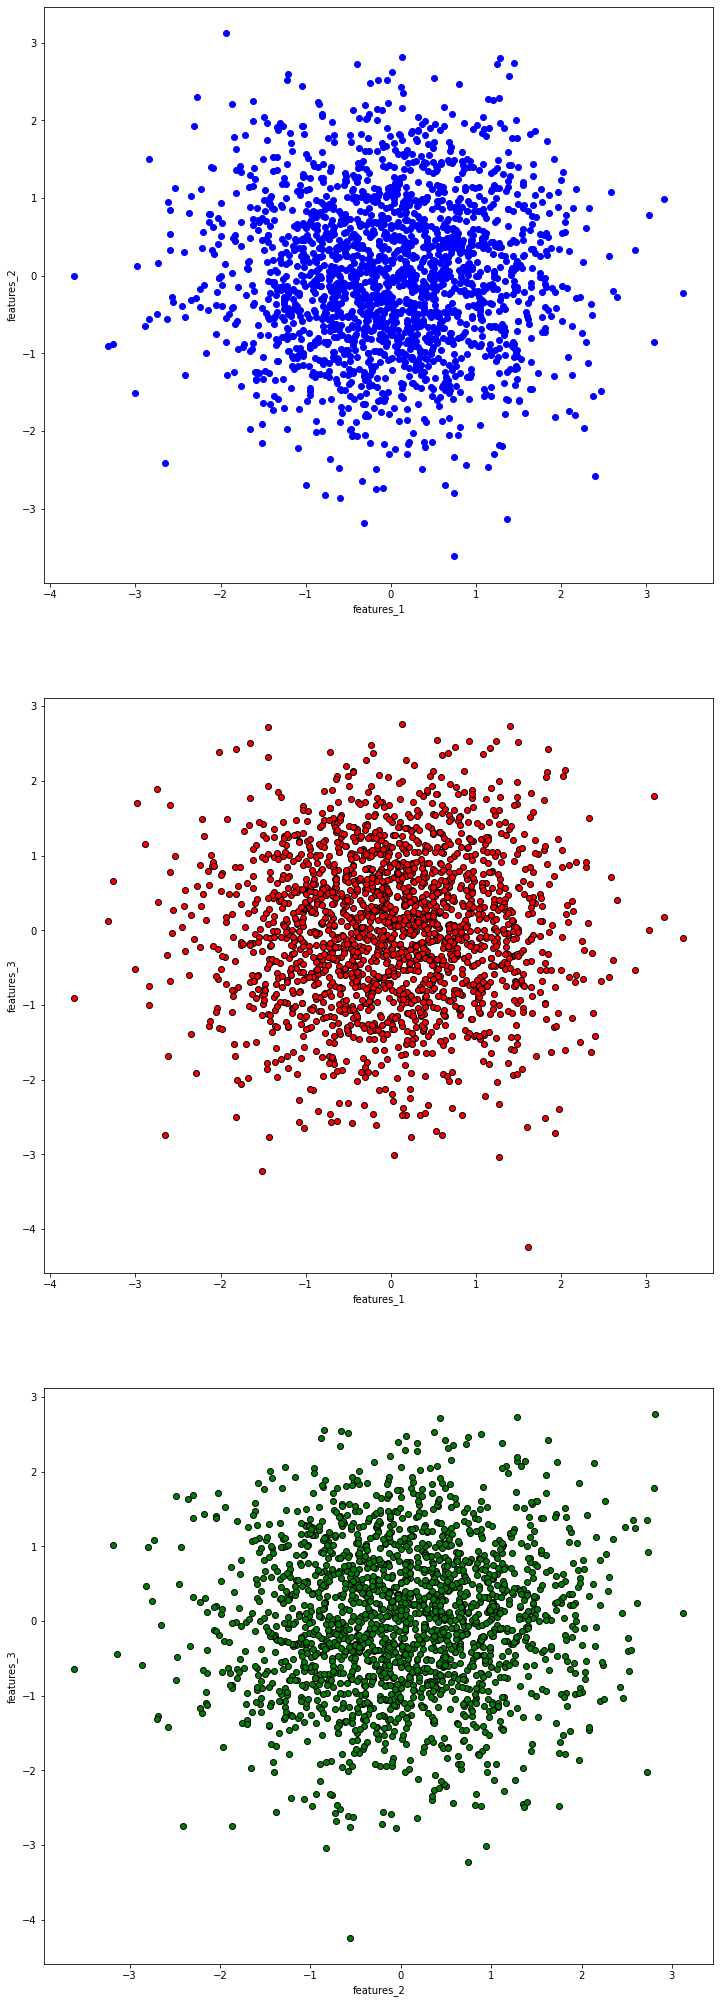

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
file_name = "data/regression_generated.csv"
data = pd.read_csv(file_name)
x = data['features_1']
y = data['features_2']
z = data['features_3']
fig, (ax1, ax2 , ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,36))

ax1.scatter(x=x, y=y, marker='o', c='b', edgecolor='b')
ax2.scatter(x=x, y=z, marker='o', c='r', edgecolor='k')
ax3.scatter(x=y, y=z, marker='o', c='g', edgecolor='k')
ax1.set_xlabel("features_1")
ax1.set_ylabel("features_2")
ax2.set_xlabel("features_1")
ax2.set_ylabel("features_3")
ax3.set_xlabel("features_2")
ax3.set_ylabel("features_3")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

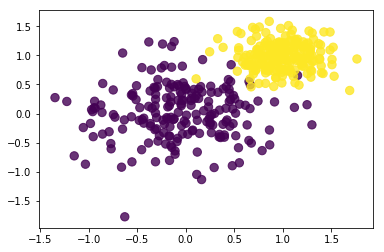

In [6]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

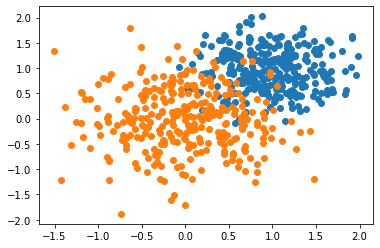

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,300)

x1 = gaussian(1,0.4)
y1 = gaussian(1,0.4)
plt.scatter(x1,y1)

x2 = gaussian(0,0.6)
y2 = gaussian(0,0.6)
plt.scatter(x2,y2)

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
2          -7.20        3.4
3          -4.15        8.4
4          -6.59        1.7
5         -11.02        4.4
6          -2.27        0.6
...          ...        ...
11088      -3.26        1.4
11120      -3.51       13.9
11121      -4.38        9.6
11123      -2.64        4.6
11125      -2.66        1.9

[641 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 2 to 11125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  641 non-null    float64
 1   distances  641 non-null    float64
dtypes: float64(2)
memory usage: 15.0 KB
None
slope = 0.07989758117486036  intercept = 9.820720326596168  r_value = 0.05659751187242404  p_value = 2.2958576253921742e-09  stderr = 0.013360155768341922
(array([309, 156, 110,  63], dtype=int64), array([ 0,  5, 10, 15, 20]))
[(0, 5], (5, 10], (0, 5], (0, 5], (0, 5], ..., (0, 5], (10, 15], (5, 10], (0, 5], (0, 5]]
Length: 641

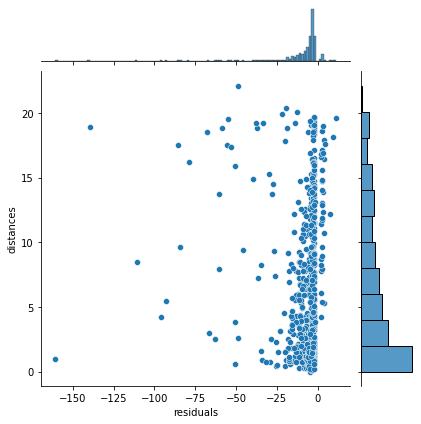

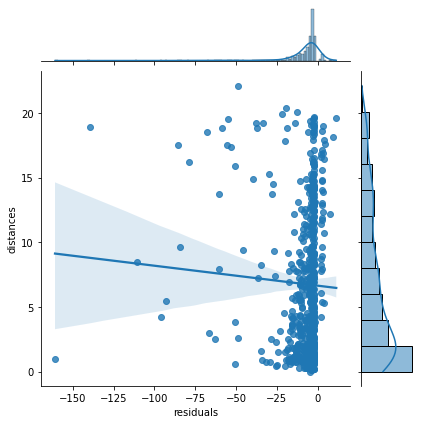

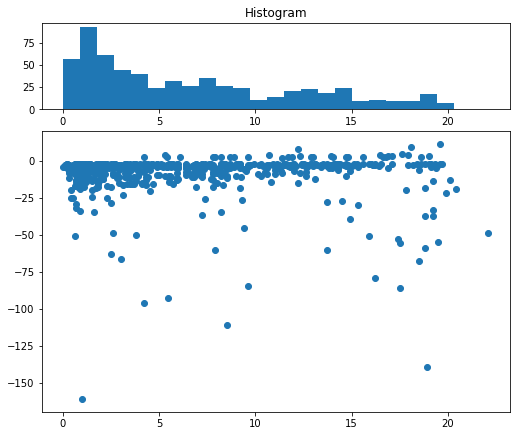

x:  [ 0.442  1.326  2.21   3.094  3.978  4.862  5.746  6.63   7.514  8.398
  9.282 10.166 11.05  11.934 12.818 13.702 14.586 15.47  16.354 17.238
 18.122 19.006 19.89  20.774 21.658]
y:  [-10.85858566  -6.83815476 -11.7667328   -8.64189342  -9.35241071
  -7.42688492  -5.85564286  -6.8925      -8.61789555  -9.018
 -14.9772674   -5.170625    -2.79816667  -3.9554386   -6.60047619
  -3.80782609  -6.82782353 -13.32769697   0.07111111 -24.86825
 -24.10928571 -11.69923077 -18.03333333          nan   0.
   0.        ]
err_y: [18.12055212  5.50970214 15.83434069  8.33384041 16.5071234  15.01341966
  3.80411159  6.97070273 11.88632493 21.21897717 23.63362419  4.15230127
  2.64467462  4.58107271 13.44473892  5.43712516 10.68906409 25.0331767
  3.16567509 33.14577381 38.91834923 17.92931268  3.87395004         nan
  0.          0.        ]


In [10]:
import pandas as pd   
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


data=np.load("data/residuals_261.pkl",allow_pickle=True).item()
data=pd.DataFrame(data)

x = data.residuals
y = data.distances

data.drop( data[abs(data['residuals']) < 2 ].index , inplace=True)
data=data[abs(data['residuals'])>2] 

sns.jointplot(x="residuals", y="distances", data=data)

print(data)
print(data.info())




slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
print("slope =",slope," intercept =",intercept," r_value =",r_value," p_value =",p_value," stderr =",stderr)
sns.jointplot(data=data, x="residuals", y="distances", kind="reg")


dis_array=np.array(data.distances)
bins=[0,5,10,15,20]
dis_bin=np.histogram(dis_array,bins = bins ) 
print(dis_bin)
binned_data=pd.cut(dis_array,bins)
print(binned_data)


mean_std=data.groupby(pd.cut(data['distances'], bins=bins))['residuals'].agg(['mean','std'])
print(mean_std)




fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.65, 0.65])
ax_histx = fig.add_axes([0.1, 0.8, 0.65, 0.2], sharex=ax)
ax_histx.set_title('Histogram')
ax.scatter(data['distances'],data['residuals'])
h,bins,_ = ax_histx.hist(data['distances'],bins = 25)
x = 0.5*(bins[1:]+bins[:-1])
y = np.zeros(len(bins))
err_y = np.zeros(len(bins))
for i in range(0,len(x)-1):
    mask_i = (data['distances']>x[i]) & (data['distances']<x[i+1])
    y[i] = np.mean(data[mask_i].residuals)
    err_y[i] = np.std(data[mask_i].residuals)
plt.show()
print("x: ",x)
print("y: ",y)
print("err_y:", err_y)

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
